## Data Wrangling

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows', None)

---
### Summary of the dataset
- The dataset consists of the specifications of various laptops which were web scrapped from flipkart.com on `10 Aug 2023` for the purpose of performing EDA to evaluate and gain insights about the features affecting the price of the laptops. 
- The dataset consists of 984 records of various laptops with 21 features describing the specifications of each laptop.  
- Note that while scrapping **0**, **No**, **None** default values were used wherever necessary to fill up the unavailaible attributes in specifications of the laptops on its respective page.
    - Eg. if **Touchscreen** feature was unavailable for a specific laptop on its webpage, then value **No** was assigned. 
- Also, the price may fluctuate during festivals, saving days and on similar occassion and it may also change day to day. Though the later would be minor compared to fluctuation which would happen in former.

### Column description
1. `Name`:
    - Name of the manufacturing company of laptop, followed by laptop's important specifications
2. `Price`:
    - The buying price of the laptop as on flipkart.com on 03 Aug 2023 in Indian currency
3. `Type`:
    - Type of laptop refers to its category or intended use eg. Convertible 2-in-1 Laptops, ultrabook, notebook
4. `Processor Brand`:
    - Name of company whose processor is integrated in the laptop
5. `Processor Name`:
    - Name of the processor eg. core i5, core i9,  Ryzen 5 Hexa Core	
6. `Processor Generation`:
    - Number designating the version of the microprocessor architecture produced by the company. Higher the number better the improvement. Basically indicating its technological advancement.
7. `SSD`:
    - Yes or No values indicating whether the laptop is incorporated with a solid state drive
8. `SSD Capacity`:
    - The volume of storage in gigabytes (GB) or (TB) the solid state drive in the laptop has
9. `HDD Capacity`:
    - The volume of storage gigabytes (GB) or (TB) the hard drive has in the laptop. 0 if the laptop has no HDD
10. `EMMC Storage Capacity`:
    - The capacity of embedded multimedia card (eMMC) storage, if applicable, in gigabytes (GB)
11. `RAM`:
    - The amount of random access memory (RAM) in gigabytes (GB).
12. `Clock Speed`:
    - The clock speed of the CPU, measured in gigahertz (GHz).
13. `Graphic Processor`:
    - The type or brand of the graphics processing unit (GPU), responsible for rendering graphics and video consisting of information regarding the manufacturer, model name, series performance level.
14. `Operating System`:
    - The operating system installed on the laptop (e.g., Windows, macOS, Linux).
15. `Touchscreen`:
    - In Yes or No indicating if the laptop's screen is touchscreen or not.
16. `Screen Size`:
    - The diagonal size of the laptop screen in centimeters as well as in inches.
17. `Screen Resolution`:
    - The resolution of the screen (e.g., 1920x1080) indicating the number of pixels.
18. `Screen Type`:
    - The technology used for the laptop screen (e.g., LED, OLED, IPS) with additional info such as brightness, refresh rates in some records.
19. `Weight`:
    - The weight of the laptop in kilograms (kg) 
20. `Fingerprint Sensor`:
    - Whether the laptop has fingerprint sensor or not.
21. `Backlit Keyboard`:
    - Whether the laptop keyboard has backlit illumination or not.

In [4]:
# Import the data

df = pd.read_excel('Laptops_data.xlsx')
df.sample(5)

,Name,Price,Type,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Clock Speed,Graphic Processor,Operating System,Touchscreen,Screen Size,Screen Resolution,Screen Type,Weight,Fingerprint Sensor,Backlit Keyboard
60,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,"₹35,990",Thin and Light Laptop,Intel,Core i3,11th Gen,Yes,512 GB,0,0,8 GB,"Base Clock 1.70 Ghz, Max Turbo Boost Frequency...",Intel Integrated UHD,Windows 11 Home,No,35.56 cm (14 Inch),1920 x 1080 Pixel,"Full HD TN 250nits Anti-glare, 45% NTSC",1.41 Kg,No,No
649,Lenovo Core i5 11th Gen - (8 GB/512 GB SSD/Win...,"₹47,000",Thin and Light Laptop,Intel,Core i5,11th Gen,Yes,512 GB,0,0,8 GB,2.4 GHz with Turbo Boost Upto 4.2 GHz,Intel Integrated Iris Xe,Windows 10 Home,No,35.56 cm (14 inch),1920 x 1080 Pixel,Full HD IPS LED Anti-glare Display,1.6 kg,No,No
265,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990",Laptop,Apple,M2 Pro,NaN,Yes,512 GB,0,0,16 GB,NaN,NaN,macOS Ventura,No,40.64 cm (16 Inch),3456 x 2234 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras...",2.15 Kg,No,Yes
277,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,"₹17,990",Chromebook,Intel,Celeron Dual Core,NaN,No,0,0,64 GB,4 GB,2.8,Intel Integrated UHD Graphics 600,Chrome,No,29.46 cm (11.6 Inch),1366 x 768 Pixel,"HD, LCD (Anti-glare display, LED Backlit, Brig...",1.24 Kg,No,No
876,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,"₹17,990",Chromebook,Intel,Celeron Dual Core,NaN,No,0,0,64 GB,4 GB,2.8,Intel Integrated UHD Graphics 600,Chrome,No,29.46 cm (11.6 Inch),1366 x 768 Pixel,"HD, LCD (Anti-glare display, LED Backlit, Brig...",1.24 Kg,No,No


## Manual asessment of the data (Column by Column):

### Additional info:
- NO problem observed for following columns:
    1. Name
    2. Price
    3. Type
    4. Processor brand
    5. Processor name
    6. SSD (Yes/No)
    7. RAM
    8. Operating System
    9. Touchscreen
    10. Fingerprint Sensor
    11. Backlit keyboard
- Processor brand is mostly populated with intel, AMD, MediaTek but largely with intel.
- Processor generation are largely known for intel processors and for others it is minimal.
- SSD Capacity mostly contains four types of values: 256 GB, 512 GB, 1TB, 0
- HDD Capacity contains mostly two values: 0, 1 TB
- EMMC Storage Capacity mostly contains: 0, 64 GB, 128 GB
- Operating system is mostly populated with Windows 11 Home 

### Issues with the dataset:
1. **Dirty data**
    - **Processor generation** 
        - Has missing values and they are missing at random `Completeness issue`
    
    - **SSD Capacity**:
        - values are in GBs and TBs `Consistency issue`
    
    - **Handle the units** 
        - In the attributes SSD Capacity, HDD Capacity, EMMC Storage Capacity `Consistency issue`
        
    - **Clock speed**:
        - missing values `Completeness issue`, 
        - sometime the values are just a number and mostly sentences for eg. 2.8, 2.4, Upto 4.60GHz,2.4GHz Upto 4.1GHz, 2.5 GHz with Max Turbo Boost Frequency Up to 4.50 GHz `Validity and Consistency issue`
        
    - **Graphic processor**:
        - Missing values by the name of NA `Completeness issue`.
        - Portions of string are repeated in some cases `Consistency issue`.
        - Some examples of inconsistent values: NA Intel UHD Graphics, Intel Integrated Intel UHD Graphics, AMD Radeon AMD, NVIDIA GeForce RTX RTX 3060, RDNA 2 RDNA 2, AMD Radeon amd, Arc A370M A370M
    
    - **Screen size**:
        - has inaccurate values at some records such as 96.52 cm (38 cm), 100.63 cm (39.62 cm)   `Accuracy issue`
    
    - **Screen resolution**:
        - Pixel at some records is written as Pixels, pixel `Accuracy issue`
        - 1920 x 1080 Pixel at some records is written as 1920x1080$$ Pixels pixel,1280X800 pixel, 1920*1080 pixel and this issue is reflected for some other resolution too like 2880 x 1800, 3840 x 2400   `Consistency issue`
        - HD pixel instead of 1366 x 768 Pixel  `Validity`
    - **Screen Type**:
        - missing values `Completeness issue`
        - Information does not follow any specific pattern. In most case extra info such as brightness, LED backlit, anti-glare, IPS level is also present which is absent for other records `Consistency issue`
   
    - **Weight**:
        - Missing values are present `Completeness issue`
        - Kg at some records and 'kg', 'kg kg', 'KG' at some other `Consistency issue`

2. NO **Messy Data** Observed

## So many dfs...
1. df -> main df i.e with all duplicate, missing values and other stuff (984,21)
2. df1 -> after dropping duplicates from df; shape => (607,21)
3. df2 -> after dropping columns processor generation and clock speed from df1; shape => (607,19)
4. df3 -> after dropping screen resolution column from df2; shape => (607,20)
5. df4 -> after dropping old Screen Type column from df3 and adding new column Standard(renamed back to screen type); shape => (607,20)
6. df5 -> After merging missing_weights_found.xlsx and dropping uneccessary columns; shape => (607,20)
7. df6 -> After merging missing_gpu_found.xlsx and dropping uneccessary columns; shape => (607,20)
    - **df6** is free of missing values
8. df7 -> Imported NoNull_LaptopsData; shape => (607,20)
9. df8 -> After fetching GPU brand from Graphic Procesor and dropping the later column; => (607,21)
10. df9 -> After dropping Name column; shape => (607,20)
11. df10 -> After dropping duplicates from df9; shape => (577,20)

---
### Taking an overview of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   984 non-null    object
 1   Price                  984 non-null    object
 2   Type                   984 non-null    object
 3   Processor Brand        984 non-null    object
 4   Processor Name         984 non-null    object
 5   Processor Generation   569 non-null    object
 6   SSD                    984 non-null    object
 7   SSD Capacity           984 non-null    object
 8   HDD Capacity           984 non-null    object
 9   EMMC Storage Capacity  984 non-null    object
 10  RAM                    984 non-null    object
 11  Clock Speed            848 non-null    object
 12  Graphic Processor      950 non-null    object
 13  Operating System       984 non-null    object
 14  Touchscreen            984 non-null    object
 15  Screen Size            

- All the features are of object type
- Process Generation, Graphic processor, Screen Type consists of null values.
---

### Exploring the duplicates
#### Observations:
- A total 377 duplicate observations are present
- On further investigation it is found that the duplicates are genuine
    - Laptop at index 26 has 7 duplicate entries
    - Laptop at index 980 has 27 duplicate entries
- **Concluded** to drop all the duplicates

In [4]:
# Check for duplicates

df.duplicated().sum()

377

In [5]:
# Some of the duplicate entries

df[df.duplicated()].sample(5)

,Name,Price,Type,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Clock Speed,Graphic Processor,Operating System,Touchscreen,Screen Size,Screen Resolution,Screen Type,Weight,Fingerprint Sensor,Backlit Keyboard
817,Primebook 4G enabled Android based MediaTek MT...,"₹14,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,NaN,No,0,0,128 GB,4 GB,Max Frequency up to 2.0 GHz,MediaTek Integrated ARM Mali G72,Prime OS,No,27.94 cm (11 Inch),1366 x 768 Pixel,HD IPS,1.065 Kg,No,No
770,Primebook 4G Android Based MediaTek MT8788 - (...,"₹13,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,NaN,No,0,0,64 GB,4 GB,Max Frequency Up to 2.0 GHz,MediaTek Integrated ARM Mali G72,Prime OS,No,29.46 cm (11.6 Inch),1366 x 768 Pixels,HD IPS,1.065 Kg,No,No
416,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...,"₹35,990",Thin and Light Laptop,Intel,Core i3,11th Gen,Yes,512 GB,0,0,8 GB,"Base Clock 1.70 Ghz, Max Turbo Boost Frequency...",Intel Integrated UHD,Windows 11 Home,No,35.56 cm (14 Inch),1920 x 1080 Pixel,"Full HD TN 250nits Anti-glare, 45% NTSC",1.41 Kg,No,No
947,Primebook 4G enabled Android based MediaTek MT...,"₹14,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,NaN,No,0,0,128 GB,4 GB,Max Frequency up to 2.0 GHz,MediaTek Integrated ARM Mali G72,Prime OS,No,27.94 cm (11 Inch),1366 x 768 Pixel,HD IPS,1.065 Kg,No,No
161,Lenovo IdeaPad 3 Intel Core i5 12th Gen - (16 ...,"₹53,990",Thin and Light Laptop,Intel,Core i5,12th Gen,Yes,512 GB,0,0,16 GB,"1.3 GHz upto Max 4.4 GHz,",Intel Integrated Iris Xe,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixel,Full HD TN 250nits Anti-glare,1.63 Kg,No,No


#### Further investigating one of the duplicates

In [6]:
df.iloc[26]['Name']

'ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook\xa0\xa0(15.6 inch, Silver, 1.69 Kg)'

In [7]:
# Laptop at index 26 has 7 duplicate entries

df[df['Name']==df.iloc[26]['Name']].shape

(7, 21)

In [8]:
for i in df[df['Name']==df.iloc[26]['Name']]['Name']:
    print(i)

ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)
ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)
ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)
ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)
ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)
ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)
ASUS Chromebook Touch Intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chromebook  (15.6 inch, Silver, 1.69 Kg)


In [9]:
# Laptop at index 980 has 27 duplicate entries

df[df['Name']==df.iloc[980]['Name']].shape[0]

27

#### Dropping all duplicates and collecting unique elements in new DataFrame df1

In [10]:
df1 = df.drop_duplicates(keep='first')

In [11]:
# Check for duplicates again
df1.duplicated().sum()

0

In [12]:
df1.shape

(607, 21)

---

## Handling Missing values

#### Finding the percentage of missing values in each attribute

In [13]:
df1.isnull().sum()/len(df1)*100

Name                      0.000000
Price                     0.000000
Type                      0.000000
Processor Brand           0.000000
Processor Name            0.000000
Processor Generation     39.209226
SSD                       0.000000
SSD Capacity              0.000000
HDD Capacity              0.000000
EMMC Storage Capacity     0.000000
RAM                       0.000000
Clock Speed              13.014827
Graphic Processor         5.436573
Operating System          0.000000
Touchscreen               0.000000
Screen Size               0.000000
Screen Resolution         0.000000
Screen Type               7.578254
Weight                    6.425041
Fingerprint Sensor        0.000000
Backlit Keyboard          0.000000
dtype: float64

<AxesSubplot: >

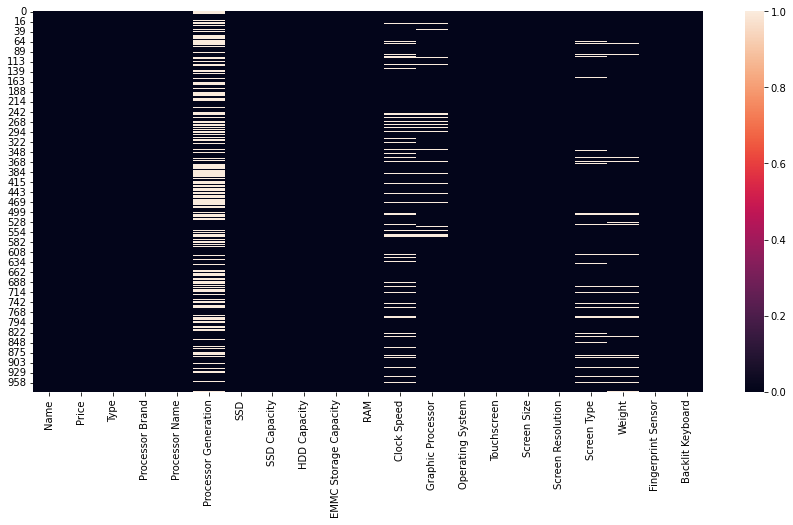

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(data=df1.isnull())

### Handling missing values in Processor generation, Clock Speed column

1. **Observations on Processor Generation Column:**
    - The missing values are mostly associated with non-Intel processors.
    - The "Processor brand" column already captures the performance aspect, including the number of cores and performance level.
    - The merging of "Processor generation" with "Processor Brand" might not significantly improve the analysis but will surely complicate it by introducing more categories.
    -**Conclusion:** It is better to drop the column itself
2. **Observations on Clock speed column:**
    - The column has values in mixed format and the pattern too is less consistent.
    - On researching over the relationship between processor brand and its clock speed, it seems convincing that as number in processor brand increases the clock speed as well increases which is shown below for intel processors:
    |Processor Brand|Clock Speed|
    |---|---|
    |Celeron	|1.1 GHz to 3.6 GHz|
    |Pentium	|2.2 GHz to 4.4 GHz|
    |Core i3|3.1 GHz to 4.7 GHz|
    |Core i5|2.5 GHz to 5.0 GHz|
    |Core i7|2.8 GHz to 5.3 GHz|
    |Core i9|3.3 GHz to 5.5 GHz|
    |Xeon	|1.9 GHz to 5.7 GHz|
    - Though there are other factors such as the number of cores and threads, architecture, cache size which contributes in deciding performance.

In [15]:
# Finding the total number of missing values in the processor genration column

df1['Processor Generation'].isnull().sum()

238

In [16]:
# Forming a temp_df to take an overview of processor related attributes

temp_df = df1[['Processor Brand','Processor Name','Processor Generation']]
temp_df

,Processor Brand,Processor Name,Processor Generation
0,Intel,Celeron Dual Core,NaN
1,MediaTek,MediaTek MT8788,NaN
2,AMD,Ryzen 5 Hexa Core,NaN
3,AMD,Athlon Dual Core,NaN
4,AMD,Ryzen 3 Dual Core,NaN
5,Intel,Core i3,11th Gen
6,Intel,Core i5,11th Gen
7,MediaTek,MediaTek MT8788,NaN
8,Intel,Core i3,11th Gen
9,Intel,Core i3,11th Gen


In [17]:
# Analysing the processor name, brand for which processor generation is unassigned

temp_df[temp_df['Processor Generation'].isnull()]

,Processor Brand,Processor Name,Processor Generation
0,Intel,Celeron Dual Core,NaN
1,MediaTek,MediaTek MT8788,NaN
2,AMD,Ryzen 5 Hexa Core,NaN
3,AMD,Athlon Dual Core,NaN
4,AMD,Ryzen 3 Dual Core,NaN
7,MediaTek,MediaTek MT8788,NaN
14,AMD,Ryzen 5 Hexa Core,NaN
17,Intel,Celeron Dual Core,NaN
19,Apple,M1,NaN
22,AMD,Ryzen 5 Hexa Core,NaN


### Handling missing values in Clock speed column

In [18]:
# Finding the number of missing values in clock speed column

df1['Clock Speed'].isnull().sum()

79

In [19]:
df1[df1['Clock Speed'].isnull()][['Processor Brand','Processor Name','Processor Generation','Clock Speed']]

,Processor Brand,Processor Name,Processor Generation,Clock Speed
10,Intel,Core i3,10th Gen,NaN
19,Apple,M1,NaN,NaN
20,Intel,Celeron Dual Core,11th Gen,NaN
64,AMD,Ryzen 3 Quad Core,NaN,NaN
69,AMD,Athlon Dual Core,NaN,NaN
95,AMD,Ryzen 5 Hexa Core,10th Gen,NaN
103,Intel,Core i3,11th Gen,NaN
104,Apple,M2,NaN,NaN
105,Intel,Core i3,11th Gen,NaN
119,Apple,M2,NaN,NaN


#### Analysing the pattern of clock speed for randomly selected processor name 

In [20]:
# When core i5, max turbo frequency is upto 4.4GHz

df1[(df1['Processor Name']=='Core i5') & (df1['Processor Generation']=='12th Gen')]['Clock Speed']

21                             1.3 GHz upto Max 4.4 GHz,
38                 1.3 GHz with Turbo Boost Upto 4.4 GHz
43                                          Upto 4.4 GHz
68           3.3 GHz upto max turbo frequency at 4.4 Ghz
78           3.3 GHz upto max turbo frequency at 4.4 Ghz
79                 1.3 GHz with Turbo Boost Upto 4.4 GHz
102                                 3.30GHz Upto 4.40GHz
108                                                  4.5
111    Base Frequency 2.0 GHz, Max Turbo Boost at 4.4...
122                                                  4.4
148    Base Frequency 3.30 GHz, Max Turbo Boost Frequ...
152    Base Frequency 3.30 GHz, Max Turbo Boost Frequ...
162                           Max Turbo Boost at 4.4 GHz
175                         1.3 Ghz. Turbo Upto 4.4 Ghz.
178    2.5 GHz with Max Turbo Boost Frequency Up to 4...
183    Base Frequency 3.30 GHz, Max Turbo Boost Frequ...
202                         Max Turbo Boost Upto 4.4 GHz
203                     Max Tur

In [21]:
# When Ryzen 5 Hexa Core, max turbo frequency upto 4.5 Ghz

df1[(df1['Processor Name']=='Ryzen 5 Hexa Core')]['Clock Speed']

2                  2.1 GHz with Turbo Boost Upto 4.0 GHz
14                                     4.0 GHz max boost
22                         Up to 4.0 GHz max boost clock
28            3.3GHz Upto max turbo frequency at 4.2 GHz
39           2.0 GHz upto max turbo frequency at 4.5 Ghz
48     2.1 GHz with Max Turbo Boost Frequency Up to 4...
52                                   3.3GHz upto 4.2 GHz
53            3.3GHz Upto max turbo frequency at 4.2 GHz
95                                                   NaN
98           2.0 GHz upto max turbo frequency at 4.5 Ghz
149    Base Frequency 2.3 GHz, Max Turbo Boost Freque...
155                                   3.3GHz Upto 4.2GHz
158    Base Frequency 2.1 GHz, Max Turbo Boost at 4.0...
169                                                  4.3
189           3.3GHz Upto max turbo frequency at 4.2 GHz
193           3.3GHz Upto max turbo frequency at 4.2 GHz
212         2.9 GHz upto max turbo frequency at 4.55 Ghz
269           3.3GHz Upto max t

#### No Clock speed for Apple laptops

In [22]:
df1[df1['Processor Brand']=='Apple']['Clock Speed']

19     NaN
104    NaN
119    NaN
245    NaN
248    NaN
255    NaN
265    NaN
268    NaN
274    NaN
282    NaN
283    NaN
289    NaN
293    NaN
342    NaN
373    NaN
389    NaN
419    NaN
445    NaN
465    NaN
472    NaN
549    NaN
555    NaN
559    NaN
562    NaN
563    NaN
565    NaN
694    NaN
805    NaN
Name: Clock Speed, dtype: object

#### Dropping both the Processor generation and Clock Speed column

In [23]:
df2 = df1.drop(columns=['Processor Generation','Clock Speed'],axis=1)
df2.shape

(607, 19)

---
### Handling missing values in Screen Type column
- The missing values are mostly from values with screen resolution 1920 X 1080, 1366 x 768, 2880 x 1800
- But as seen in the screen resolution column the data has **consistency** issues, for example:
    - 1920 X 1080 is incorrectly written as 1080 * 1920 pixel, 1920 X 1080$$ Pixels pixel, 1,920 x 1,080 pixel, 1080-1920 pixel at many places
    - 1366 x 768 is incorrectly written as ?1366 x 768 pixel, HD pixel
- **Solution:**
    - The accurate filling of missing values in screen type would be more reliable on the basis of the screen resolution of the laptops.
    - The following table consist of values obtained by analysing the screen resolution attribute in the dataset and from Ref: [Common display resolutions](https://en.wikipedia.org/wiki/Display_resolution)
        - |Screen Type(Standard)|Width(px)|Height(px)|Remarks|
           |---|---|---|---|
           |HD|1366|768|from reference|
           |WXGA|1280|800|from reference|
           |FHD|1920|1080|from reference|
           |WUXGA|1920|1200|from reference|
           |QHD|2560|1440|from reference|
           |WQXGA|2560|1600|from reference|
           |WQXGA|2560|1664|close to 2650x1600|
           |2.8K|2880|1800|from analysing the value in the attr|
           |2.8K|2880|1864|close to 2880x1800|
           |3k and higher|>3000|>1900|from analysing the value in the attr|

    - Before filling the missing values in **screen type**, the accuracy issue with **screen resolution** attribute needs to be handled

In [24]:
df2['Screen Type'].isnull().sum()

46

In [25]:
df2[['Screen Resolution','Screen Type']].sample(8)

,Screen Resolution,Screen Type
983,1920 x 1080 Pixel,"FHD IPS 250nits Anti-glare, 120Hz, 45% NTSC, D..."
339,1920 x 1080 Pixel,Full HD WVA AG 120Hz 250 nits Narrow Border
952,1920 x 1080 pixel,NaN
363,1920 x 1080 Pixel,Full HD
375,2880 x 1800 Pixel,"2.8K, OLED, 0.2ms response time, 90Hz refresh ..."
648,1920 x 1080 Pixel,"Full HD, micro-edge anti-glare, Brightness: 25..."
828,1920 x 1200 pixel,"16.0-inch, WUXGA (1920 x 1200) 16:10 aspect ra..."
804,1920 x 1080 Pixel,"FHD , 16:9 aspect ratio, LED Backlit, IPS-leve..."


In [39]:
# Screen resolution and their corresponding null values

df2[df2['Screen Type'].notnull()][['Screen Size','Screen Resolution','Screen Type']]['Screen Resolution'].value_counts()

1920 x 1080 Pixel            278
1920 x 1080 Pixels            77
1920 x 1200 Pixel             26
2880 x 1800 Pixel             23
2560 x 1600 Pixel             19
2560 x 1440 Pixel             18
1920 x 1080 pixel             17
1366 x 768 Pixel              13
1366 x 768 Pixels              9
2560 x 1664 Pixel              7
2880 x 1864 Pixel              6
3456 x 2234 Pixel              6
1920x1080 Pixels               6
2560 x 1600 Pixels             5
2560 x 1440 PIxel              5
1920 x 1200 pixel              4
3024 x 1964 Pixel              4
2560 x 1440 Pixels             3
3840 x 2400 Pixel              3
3840 x 2160 Pixel              3
2160 x 1440 Pixel              3
1920x1080 Pixel                2
3072 x 1920 Pixel              2
2560 X 1440 Pixel              2
1920 x 1080$$Pixels pixel      2
2880 x 1800 PIxel              2
2560 x 1600 PIxel              2
1920x1080$$Pixels pixel        2
1920 x 1200 Pixels             2
2880 x 1800 Pixels             2
1366 x 768

In [64]:
# Check screen res for only apple laptops
#- For these cases scree res is always >= 25600x1600

df2[df2['Name'].str.split().str[0]=='APPLE'][['Price','Screen Resolution','Screen Type']]

,Price,Screen Resolution,Screen Type
19,"₹79,990",2560 x 1600 Pixel,"Quad LED Backlit IPS Display (227 PPI, 400 nit..."
104,"₹1,07,910",2560 x 1664 Pixel,"Liquid Retina Display, LED-backlit display wit..."
119,"₹1,07,990",2560 x 1664 Pixel,"Liquid Retina Display, LED-backlit display wit..."
245,"₹2,29,990",3456 x 2234 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras..."
248,"₹1,54,900",2880 x 1864 Pixel,"Liquid Retina display, LED-backlit display wit..."
255,"₹1,06,990",2560 x 1664 Pixel,"Liquid Retina Display, LED-backlit display wit..."
265,"₹2,29,990",3456 x 2234 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras..."
268,"₹1,34,900",2880 x 1864 Pixel,"Liquid Retina display, LED-backlit display wit..."
274,"₹1,11,990",2560 x 1600 Pixels,"Quad LED Backlit IPS Display (227 PPI, 400 nit..."
282,"₹1,19,990",2560 x 1600 Pixel,"Retina display, LED-backlit display with IPS t..."


#### Fixing the consistency issue in screen resolution
Steps taken:
1. Create two new columns x_res, y_res by splitting the old column on the basis of space between strings.
2. x_res has 0th index from string in Screen res.
3. y_res has 2nd index from string in Screen res.
4. Set values for the incorrect x_res, y_res by assessing manually.
5. Create new DataFrame df3 by dropping screen resolution column.

In [27]:
# Analysing the pattern in string for further splitting operations

df2['Screen Resolution'].str.split().value_counts()

[1920, x, 1080, Pixel]            283
[1920, x, 1080, Pixels]            78
[1920, x, 1200, Pixel]             26
[1920, x, 1080, pixel]             26
[2880, x, 1800, Pixel]             23
[2560, x, 1600, Pixel]             19
[2560, x, 1440, Pixel]             18
[1366, x, 768, Pixel]              13
[1366, x, 768, Pixels]              9
[2560, x, 1664, Pixel]              7
[1920, x, 1080$$Pixels, pixel]      7
[2880, x, 1864, Pixel]              6
[1920x1080, Pixels]                 6
[3456, x, 2234, Pixel]              6
[1920, x, 1200, pixel]              5
[1366, x, 768, pixel]               5
[2560, x, 1600, Pixels]             5
[2560, x, 1440, PIxel]              5
[3024, x, 1964, Pixel]              4
[3840, x, 2400, Pixel]              3
[3840, x, 2160, Pixel]              3
[1920, X, 1080$$Pixels, pixel]      3
[1080*1920, pixel]                  3
[2160, x, 1440, Pixel]              3
[2560, x, 1440, Pixels]             3
[1920x1080$$Pixels, pixel]          3
[2880, x, 18

In [28]:
# X(Width) resolution in pixels

df2['x_res']=df2['Screen Resolution'].str.split().str[0]

In [29]:
# Y(height) resolution in pixels

df2['y_res']=df2['Screen Resolution'].str.split().str[2]

In [30]:
# Check results

df2[['Screen Resolution','x_res','y_res']]

,Screen Resolution,x_res,y_res
0,1920 x 1080 Pixels,1920,1080
1,1366 x 768 Pixels,1366,768
2,1920 x 1080 Pixel,1920,1080
3,1366 x 768 Pixel,1366,768
4,1920 x 1080 Pixel,1920,1080
5,1920 x 1080 Pixel,1920,1080
6,1920 x 1080 Pixel,1920,1080
7,1366 x 768 Pixel,1366,768
8,2160 x 1440 Pixel,2160,1440
9,1920 x 1080 Pixel,1920,1080


#### Correcting the incorrectly written strings by manual assessing.

In [77]:


lst_1080p = [35,69,99,141,157,175,263,275,361,370,443,\
             485,489,502,503,595,613,625,684,699,714,\
             739,753,778,824,833,873,889,915,928,939,954,958]

for i in lst_1080p:
    df2.at[i,'x_res']='1920'
    df2.at[i,'y_res']='1080'

In [78]:
# correction at label 508
df2.at[508,'x_res']='1366'
df2.at[508,'y_res']='768'

# correction at label 592
df2.at[592,'x_res']='1280'
df2.at[592,'y_res']='800'

# correction at label 848
df2.at[848,'x_res']='2880'
df2.at[848,'y_res']='1800'

# correction at label 869
df2.at[869,'x_res']='3840'
df2.at[869,'y_res']='2400'

# correction at label 968
df2.at[968,'x_res']='1366'
df2.at[968,'y_res']='768'

# correction at label 975
df2.at[975,'x_res']='2880'
df2.at[975,'y_res']='1800'

In [79]:
# Creating new DataFrame df3 by dropping screen res

df3 = df2.drop(columns=['Screen Resolution'])
df3.shape

(607, 20)

In [80]:
# Convert the x_res, y_res to integer type

df3['x_res'] = df3['x_res'].astype('int32')
df3['y_res'] = df3['y_res'].astype('int32')

In [168]:
# Analysing price when x_res between (2560 and 2800) and y_res between (1440 and 1800) : for these cases price lies above 100K on an average

df3[((df3['x_res']>=2560)&(df3['x_res']<2880))&((df3['y_res']>=1600)&(df3['y_res']<1800))][['Name','Price','x_res','y_res','Type']]

,Name,Price,x_res,y_res,Type
19,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,"₹79,990",2560,1600,Thin and Light Laptop
104,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,07,910",2560,1664,Thin and Light Laptop
119,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,07,990",2560,1664,Thin and Light Laptop
219,ASUS ROG Strix SCAR 16 (2023) with 90WHr Batte...,"₹2,79,990",2560,1600,Gaming Laptop
255,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,06,990",2560,1664,Thin and Light Laptop
274,APPLE MacBook Air M1 - (16 GB/256 GB SSD/Mac O...,"₹1,11,990",2560,1600,Thin and Light Laptop
282,APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/M...,"₹1,19,990",2560,1600,Thin and Light Laptop
283,APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/M...,"₹1,19,990",2560,1600,Thin and Light Laptop
293,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...,"₹1,37,990",2560,1600,Thin and Light Laptop
342,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,"₹1,37,990",2560,1664,Thin and Light Laptop


In [120]:
# Analysing price when x_res>=300 and y_res>=1900 the price is always >1,50,000 and higher

df3[(df3['x_res']>=3000)&(df3['y_res']>=1900)][['Name','Price']]

,Name,Price
245,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990"
265,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990"
289,APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...,"₹2,48,490"
325,HP Spectre x360 (2023) OLED Eyesafe Intel Evo ...,"₹1,39,990"
373,APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...,"₹2,29,990"
419,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SS...,"₹2,25,090"
465,APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...,"₹2,29,990"
472,APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SS...,"₹3,09,490"
505,HP Spectre x360 (2023) Eyesafe Intel Evo Core ...,"₹1,46,490"
539,HP Spectre Eyesafe Intel Evo Core i7 12th Gen ...,"₹1,45,490"


In [164]:
# The only record with resolution of 1280x800 (A handheld gaming pc)

df3[(df3['x_res']==1280)&(df3['y_res']==800)][['Name','Price']]

,Name,Price
592,Valve Zen 2 2nd Gen - (16 GB/512 GB SSD/Window...,"₹70,990"


#### Creating a new column named standard based on the analysis performed on screen resolution 

In [189]:
# Function to apply on each row of df3 
def classify_resolution(row):
    if (row['x_res']==1366) & (row['y_res']==768):
        return 'HD'
    
    elif (row['x_res']==1280) & (row['y_res']==800):
        return 'WXGA'
    
    elif (row['x_res']== 1920) & (row['y_res']== 1080):
        return 'FHD'
    
    elif (row['x_res']== 1920) & (row['y_res']== 1200):
        return 'WUXGA'
    
    elif ((row['x_res']>=2000)&(row['x_res']<=2560)) & ((row['y_res']>=1200)&(row['y_res']<=1440)):
        return 'QHD'
    
    elif ((row['x_res']>=2560)&(row['x_res']<=2880)) & ((row['y_res']>=1440)&(row['y_res']<1800)):
        return 'WQXGA'
    
    elif ((row['x_res']>=2880)&(row['x_res']<3000)) & ((row['y_res']>=1800)&(row['y_res']<=1900)):
        return '2.8K'
    
    elif (row['x_res']>=3000) & (row['y_res']>=1900):
        return '3K and higher'

In [190]:
df3['Standard'] = df3.apply(classify_resolution,axis=1)

In [200]:
# Check the changes

df3[['Standard','x_res','y_res']].sample(10)

,Standard,x_res,y_res
765,WUXGA,1920,1200
445,WQXGA,2560,1664
879,FHD,1920,1080
314,WUXGA,1920,1200
258,2.8K,2880,1800
380,FHD,1920,1080
68,FHD,1920,1080
794,WUXGA,1920,1200
164,FHD,1920,1080
367,FHD,1920,1080


#### Dropping the Screen type column and renaming Standard to Screen Type



In [196]:
df4 = df3.drop(columns=['Screen Type'])


(607, 20)

In [206]:
df4.rename(columns={'Standard':'Screen Type'}, inplace=True)
df4.shape

(607, 20)

### Handling missing value in weight column

#### Steps taken for solution:
1. Created a temp_df to store records correspoding to null values
2. Converted this temp_df to an excel file
3. Manually entered the `weights` data for the null record by browsing on internet for the given laptop
4. Merged the excel file(which now consist of filled weight values for the earlier missing ones) on the basis of name with df4

In [40]:
# Creating a temp_df to store records correspoding to null values

temp_df = df1[df1['Weight'].isnull()]
temp_df

,Name,Price,Type,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Clock Speed,Graphic Processor,Operating System,Touchscreen,Screen Size,Screen Resolution,Screen Type,Weight,Fingerprint Sensor,Backlit Keyboard
69,HP 247 G8 Athlon Dual Core - (8 GB/1 TB HDD/Wi...,"₹23,990",Notebook,AMD,Athlon Dual Core,NaN,No,0,1 TB,0,8 GB,NaN,AMD Radeon,Windows 11 Home,No,35.56 cm (14 inch),?1366 x 768 pixel,NaN,NaN,No,No
95,ASUS Vivobook AMD R5 5600H Ryzen 5 Hexa Core 1...,"₹51,990",Laptop,AMD,Ryzen 5 Hexa Core,10th Gen,Yes,512 GB,0,0,16 GB,NaN,AMD Radeon AMD Radeon™ Vega 7 Graphics,Windows 11 Home,No,40.64 cm (16 inch),1920 x 1200 pixel,NaN,NaN,No,No
105,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"₹34,490",Laptop,Intel,Core i3,11th Gen,Yes,256 GB,0,0,8 GB,NaN,Intel Integrated UHD Graphics,Windows 11 Home,No,38.1 cm (15 inch),1920 x 1080 pixel,NaN,NaN,No,No
272,Lenovo Lenovo V15 Celeron Dual Core 4th Gen - ...,"₹23,390",Laptop,Intel,Celeron Dual Core,4th Gen,Yes,256 GB,0,0,8 GB,NaN,Intel Integrated Intel UHD Graphics,Windows 11 Home,No,39.62 cm (15.6 inch),1920 x 1080 pixel,Full HD,NaN,No,No
275,ASUS Ryzen 5 Octa Core - (8 GB/512 GB SSD/Wind...,"₹43,590",Laptop,AMD,Ryzen 5 Octa Core,NaN,Yes,512 GB,0,0,8 GB,NaN,AMD Radeon,Windows 11 Home,No,35.56 cm (14 inch),1920 x 1080$$Pixels pixel,NaN,NaN,No,No
361,ASUS Ryzen 7 Octa Core 10th Gen - (16 GB/512 G...,"₹1,03,500",Gaming Laptop,AMD,Ryzen 7 Octa Core,10th Gen,Yes,512 GB,0,0,16 GB,NaN,NVIDIA GeForce RTX3050- 4GB,Windows 11 Home,No,43.94 cm (17.3 inch),1080*1920 pixel,NaN,NaN,No,No
367,DELL Inspiron Core i3 11th Gen - (8 GB/512 GB ...,"₹40,990",Laptop,Intel,Core i3,11th Gen,Yes,512 GB,0,0,8 GB,NaN,NaN,Windows 11 Home,No,39.62 cm (15.6 inch),1920 X 1080 pixel,NaN,NaN,No,No
443,ASUS Ryzen 5 Quad Core - (16 GB/512 GB SSD/Win...,"₹54,990",Laptop,AMD,Ryzen 5 Quad Core,NaN,Yes,512 GB,0,0,16 GB,NaN,AMD Radeon,Windows 11 Home,No,39.62 cm (15.6 inch),1920 x 1080$$Pixels pixel,NaN,NaN,No,No
503,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,"₹41,890",Thin and Light Laptop,Intel,Core i3,11th Gen,Yes,256 GB,1 TB,0,8 GB,NaN,Intel Integrated,Windows 11 Home,No,39.62 cm (15.6 inch),1920 X 1080$$Pixels pixel,NaN,NaN,No,No
508,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,"₹21,990",Laptop,AMD,Athlon Dual Core,NaN,Yes,256 GB,0,0,4 GB,NaN,AMD Radeon RADEON,DOS,No,35.56 cm (14 inch),HD pixel,NaN,NaN,No,No


In [41]:
temp_df[['Name','Weight']].to_excel("missing_weights.xlsx")

In [208]:
fill_weights = pd.read_excel('missing_weights_found.xlsx')
fill_weights.sample(10)

,Unnamed: 0,Name,Weight
36,963,ASUS Zenbook 14 OLED Intel EVO P-Series Core i...,1.39 kg
18,715,DELL Inspiron 5430 Core i5 13th Gen - (8 GB/51...,1.53 kg
24,782,ASUS Ryzen 5 Quad Core - (16 GB/512 GB SSD/Win...,1.63 kg
4,275,ASUS Ryzen 5 Octa Core - (8 GB/512 GB SSD/Wind...,1.4 kg
29,889,DELL Vostro 3420 Business Laptop Core i5 11th ...,1.48 kg
31,915,ASUS Core i3 10th Gen - (8 GB/512 GB SSD/Windo...,1.6 kg
27,842,ASUS Ryzen 7 Dual Core 11th Gen - (16 GB/512 G...,1.4 kg
30,905,Avita SATUS S111 Celeron Dual Core - (4 GB/128...,1.3 kg
22,765,Lenovo Ryzen 5 Hexa Core - (16 GB/512 GB SSD/W...,1.55 kg
26,833,DELL Inspiron 3511 Core i5 11th Gen - (8 GB/51...,1.8 kg


In [217]:
df4 = df4.merge(fill_weights,how='left',on='Name')
df4.sample(5)

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Graphic Processor,Operating System,Touchscreen,Screen Size,Weight_x,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Unnamed: 0,Weight_y
408,HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows...,"₹42,990",Thin and Light Laptop,Intel,Core i3,Yes,256 GB,0,0,8 GB,Intel Integrated UHD,Windows 11 Home,No,39.62 cm (15.6 Inch),1.69 Kg,No,No,1920,1080,FHD,NaN,NaN
558,MSI Core i3 12th Gen - (16 GB/512 GB SSD/Windo...,"₹39,990",Thin and Light Laptop,Intel,Core i3,Yes,512 GB,0,0,16 GB,Intel Integrated UHD,Windows 11 Home,No,35.56 cm (14 Inch),1.4 Kg,No,Yes,1920,1080,FHD,NaN,NaN
1,Primebook 4G Android Based MediaTek MT8788 - (...,"₹13,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,64 GB,4 GB,MediaTek Integrated ARM Mali G72,Prime OS,No,29.46 cm (11.6 Inch),1.065 Kg,No,No,1366,768,HD,NaN,NaN
535,ASUS ROG Flow X13 with RTX 3080 eGPU Ryzen 9 O...,"₹1,79,990",2 in 1 Gaming Laptop,AMD,Ryzen 9 Octa Core,Yes,1 TB,0,0,32 GB,NVIDIA GeForce GTX 1650,Windows 10 Home,Yes,34.04 cm (13.4 inch),1.30 kg,Yes,Yes,1920,1200,WUXGA,NaN,NaN
484,DELL Inspiron Core i5 12th Gen - (16 GB/512 GB...,"₹91,958",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,16 GB,Intel Integrated Iris Xe,Windows 11 Home,No,35.56 cm (14 Inch),1.54 Kg,No,Yes,1920,1080,FHD,NaN,NaN


In [222]:
# Creating final column weight by concatenating values from weight_x and weight_y

df4['Weight'] = df4['Weight_x'].fillna(value='') + df4['Weight_y'].fillna(value='')
df4

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Graphic Processor,Operating System,Touchscreen,Screen Size,Weight_x,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Unnamed: 0,Weight_y,Weight
0,ASUS Chromebook Touch Intel Celeron Dual Core ...,"₹18,990",Chromebook,Intel,Celeron Dual Core,No,0,0,64 GB,4 GB,Intel Integrated HD 500,Chrome,Yes,39.62 cm (15.6 inch),1.69 Kg,No,No,1920,1080,FHD,NaN,NaN,1.69 Kg
1,Primebook 4G Android Based MediaTek MT8788 - (...,"₹13,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,64 GB,4 GB,MediaTek Integrated ARM Mali G72,Prime OS,No,29.46 cm (11.6 Inch),1.065 Kg,No,No,1366,768,HD,NaN,NaN,1.065 Kg
2,Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...,"₹35,990",Thin and Light Laptop,AMD,Ryzen 5 Hexa Core,Yes,512 GB,0,0,8 GB,AMD Radeon AMD,Windows 11 Home,No,39.62 cm (15.6 Inch),1.7 Kg,No,No,1920,1080,FHD,NaN,NaN,1.7 Kg
3,HP 15s (2023) Athlon Dual Core 3050U - (8 GB/5...,"₹27,990",Thin and Light Laptop,AMD,Athlon Dual Core,Yes,512 GB,0,0,8 GB,AMD Radeon AMD,Windows 11 Home,No,39.62 cm (15.6 Inch),1.69 Kg,No,No,1366,768,HD,NaN,NaN,1.69 Kg
4,HP 15s (2023) Ryzen 3 Dual Core 3250U - (8 GB/...,"₹33,990",Thin and Light Laptop,AMD,Ryzen 3 Dual Core,Yes,512 GB,0,0,8 GB,AMD Radeon AMD,Windows 11 Home,No,39.62 cm (15.6 Inch),1.69 Kg,No,No,1920,1080,FHD,NaN,NaN,1.69 Kg
5,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹34,990",Thin and Light Laptop,Intel,Core i3,Yes,512 GB,0,0,8 GB,Intel Integrated UHD,Windows 11 Home,No,39.62 cm (15.6 Inch),1.80 kg,Yes,No,1920,1080,FHD,NaN,NaN,1.80 kg
6,HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...,"₹52,990",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,16 GB,Intel Integrated Integrated,Windows 11 Home,No,39.62 cm (15.6 Inch),1.69 Kg,No,Yes,1920,1080,FHD,NaN,NaN,1.69 Kg
7,Primebook 4G enabled Android based MediaTek MT...,"₹14,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,128 GB,4 GB,MediaTek Integrated ARM Mali G72,Prime OS,No,27.94 cm (11 Inch),1.065 Kg,No,No,1366,768,HD,NaN,NaN,1.065 Kg
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"₹32,990",Thin and Light Laptop,Intel,Core i3,Yes,256 GB,0,0,8 GB,Intel Integrated UHD,Windows 10 Home,No,35.56 cm (14 inch),1.38 kg,Yes,Yes,2160,1440,QHD,NaN,NaN,1.38 kg
9,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹34,990",Thin and Light Laptop,Intel,Core i3,Yes,256 GB,0,0,8 GB,Intel Integrated UHD Graphics,Windows 11 Home,No,35.56 cm (14 inch),1.41 Kg,No,No,1920,1080,FHD,NaN,NaN,1.41 Kg


In [236]:
# Create new DataFrame df5 by dropping weight_x, weight_y,Unnamed: 0 from df4
df5 = df4.drop(columns=['Weight_x','Weight_y','Unnamed: 0'])
df5.shape

(607, 20)

### Handling missing values in Graphic Processor

#### Steps taken for solution:
1. Created a temp_df to store records correspoding to null values
2. Converted this temp_df to an excel file
3. Manually entered the `Graphic Processor` data for the null record by browsing on internet for the given laptop.
4. Merged the excel file(which now consist of filled GPU values for the earlier missing ones) on the basis of name with df4

In [83]:
df1[df1['Graphic Processor'].isnull()][['Name','Price','Graphic Processor']]

,Name,Price,Graphic Processor
19,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,"₹79,990",NaN
34,HP Athlon Dual Core 3050U - (4 GB/256 GB SSD/D...,"₹22,490",NaN
104,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,07,910",NaN
119,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,07,990",NaN
245,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990",NaN
248,APPLE 2023 Macbook Air M2 - (8 GB/512 GB SSD/m...,"₹1,54,900",NaN
255,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,06,990",NaN
265,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990",NaN
268,APPLE 2023 Macbook Air M2 - (8 GB/256 GB SSD/m...,"₹1,34,900",NaN
274,APPLE MacBook Air M1 - (16 GB/256 GB SSD/Mac O...,"₹1,11,990",NaN


In [68]:
df1[df1['Graphic Processor'].isnull()][['Name','Price','Graphic Processor']].to_excel("missing_gpu.xlsx")

In [229]:
fill_gpu = pd.read_excel('missing_gpu_found.xlsx')
fill_gpu.sample(10)

,Unnamed: 0,Name,Price,Graphic Processor
28,562,APPLE 2023 Macbook Air M2 - (8 GB/512 GB SSD/m...,"₹1,54,900",Apple 10-core GPU
16,367,DELL Inspiron Core i3 11th Gen - (8 GB/512 GB ...,"₹40,990",Intel Integrated
1,34,HP Athlon Dual Core 3050U - (4 GB/256 GB SSD/D...,"₹22,490",AMD Radeon Graphics
8,268,APPLE 2023 Macbook Air M2 - (8 GB/256 GB SSD/m...,"₹1,34,900",Apple 10-core GPU
24,539,HP Spectre Eyesafe Intel Evo Core i7 12th Gen ...,"₹1,45,490",Intel Iris X Graphics
17,373,APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...,"₹2,29,990",Apple 19-core GPU
13,293,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...,"₹1,37,990",Apple 10-core GPU
2,104,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹1,07,910",Apple 8-core GPU
32,805,APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SS...,"₹3,03,990",Apple 32-core GPU
27,559,APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SS...,"₹2,25,090",Apple 16-core GPU


In [239]:
df5 = df5.merge(fill_gpu,how='left',on='Name')
df5.sample(10)

,Name,Price_x,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Graphic Processor_x,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Unnamed: 0,Price_y,Graphic Processor_y
606,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,"₹81,550",Gaming Laptop,AMD,Ryzen 7 Octa Core,Yes,512 GB,0,0,16 GB,NVIDIA GeForce RTX 3050,Windows 11 Home,No,39.62 cm (15.6 Inch),No,Yes,1920,1080,FHD,2.25 kg,NaN,NaN,NaN
81,ASUS Vivobook S 15 OLED (2023) Intel EVO H-Ser...,"₹1,05,990",Thin and Light Laptop,Intel,Core i7,Yes,512 GB,0,0,16 GB,Intel Integrated Iris Xe,Windows 11 Home,No,39.62 cm (15.6 Inch),No,Yes,2880,1620,WQXGA,1.70 Kg,NaN,NaN,NaN
17,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,"₹17,990",Chromebook,Intel,Celeron Dual Core,No,0,0,64 GB,4 GB,Intel Integrated UHD Graphics 600,Chrome,No,29.46 cm (11.6 Inch),No,No,1366,768,HD,1.24 Kg,NaN,NaN,NaN
287,Infinix X1 Slim Series Core i5 10th Gen - (8 G...,"₹44,990",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,Intel Integrated UHD Graphics,Windows 11 Home,No,35.56 cm (14 Inch),No,Yes,1920,1080,FHD,1.24 kg,NaN,NaN,NaN
376,MSI Core i5 11th Gen - (8 GB/1 TB HDD/256 GB S...,"₹51,990",Gaming Laptop,Intel,Core i5,Yes,256 GB,1 TB,0,8 GB,NVIDIA GeForce GTX 1650,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.86 Kg,NaN,NaN,NaN
535,ASUS ROG Flow X13 with RTX 3080 eGPU Ryzen 9 O...,"₹1,79,990",2 in 1 Gaming Laptop,AMD,Ryzen 9 Octa Core,Yes,1 TB,0,0,32 GB,NVIDIA GeForce GTX 1650,Windows 10 Home,Yes,34.04 cm (13.4 inch),Yes,Yes,1920,1200,WUXGA,1.30 kg,NaN,NaN,NaN
467,HP OMEN Core i7 11th Gen - (16 GB/1 TB SSD/Win...,"₹1,13,990",Gaming Laptop,Intel,Core i7,Yes,1 TB,0,0,16 GB,NVIDIA GeForce RTX RTX 3050,Windows 11 Home,No,40.89 cm (16.1 Inch),No,Yes,1920,1080,FHD,2.32 Kg,NaN,NaN,NaN
434,ASUS ROG Strix G15 Ryzen 9 Octa Core AMD R9-59...,"₹1,04,990",Gaming Laptop,AMD,Ryzen 9 Octa Core,Yes,512 GB,0,0,16 GB,NVIDIA GeForce RTX 3050 Ti,Windows 10 Home,No,39.62 cm (15.6 inch),No,Yes,1920,1080,FHD,2.10 kg,NaN,NaN,NaN
506,DELL Core i7 12th Gen - (16 GB/512 GB SSD/Wind...,"₹1,57,375",2 in 1 Laptop,Intel,Core i7,Yes,512 GB,0,0,16 GB,NVIDIA GeForce MX550,Windows 11 Home,Yes,40.64 cm (16 Inch),No,No,3840,2160,3K and higher,2.1 Kg,NaN,NaN,NaN
593,DELL Core i5 12th Gen - (8 GB/512 GB SSD/Windo...,"₹73,500",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,NVIDIA GeForce MX550,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.65 Kg,NaN,NaN,NaN


In [243]:
# Creating final column Graphic Processor by concatenating values from Graphic Processor_x and Graphic Processor_y

df5['Graphic Processor'] = df5['Graphic Processor_x'].fillna(value='') + df5['Graphic Processor_y'].fillna(value='')
df5

,Name,Price_x,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Graphic Processor_x,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Unnamed: 0,Price_y,Graphic Processor_y,Graphic Processor
0,ASUS Chromebook Touch Intel Celeron Dual Core ...,"₹18,990",Chromebook,Intel,Celeron Dual Core,No,0,0,64 GB,4 GB,Intel Integrated HD 500,Chrome,Yes,39.62 cm (15.6 inch),No,No,1920,1080,FHD,1.69 Kg,NaN,NaN,NaN,Intel Integrated HD 500
1,Primebook 4G Android Based MediaTek MT8788 - (...,"₹13,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,64 GB,4 GB,MediaTek Integrated ARM Mali G72,Prime OS,No,29.46 cm (11.6 Inch),No,No,1366,768,HD,1.065 Kg,NaN,NaN,NaN,MediaTek Integrated ARM Mali G72
2,Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...,"₹35,990",Thin and Light Laptop,AMD,Ryzen 5 Hexa Core,Yes,512 GB,0,0,8 GB,AMD Radeon AMD,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.7 Kg,NaN,NaN,NaN,AMD Radeon AMD
3,HP 15s (2023) Athlon Dual Core 3050U - (8 GB/5...,"₹27,990",Thin and Light Laptop,AMD,Athlon Dual Core,Yes,512 GB,0,0,8 GB,AMD Radeon AMD,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1366,768,HD,1.69 Kg,NaN,NaN,NaN,AMD Radeon AMD
4,HP 15s (2023) Ryzen 3 Dual Core 3250U - (8 GB/...,"₹33,990",Thin and Light Laptop,AMD,Ryzen 3 Dual Core,Yes,512 GB,0,0,8 GB,AMD Radeon AMD,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.69 Kg,NaN,NaN,NaN,AMD Radeon AMD
5,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹34,990",Thin and Light Laptop,Intel,Core i3,Yes,512 GB,0,0,8 GB,Intel Integrated UHD,Windows 11 Home,No,39.62 cm (15.6 Inch),Yes,No,1920,1080,FHD,1.80 kg,NaN,NaN,NaN,Intel Integrated UHD
6,HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...,"₹52,990",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,16 GB,Intel Integrated Integrated,Windows 11 Home,No,39.62 cm (15.6 Inch),No,Yes,1920,1080,FHD,1.69 Kg,NaN,NaN,NaN,Intel Integrated Integrated
7,Primebook 4G enabled Android based MediaTek MT...,"₹14,990",Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,128 GB,4 GB,MediaTek Integrated ARM Mali G72,Prime OS,No,27.94 cm (11 Inch),No,No,1366,768,HD,1.065 Kg,NaN,NaN,NaN,MediaTek Integrated ARM Mali G72
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,"₹32,990",Thin and Light Laptop,Intel,Core i3,Yes,256 GB,0,0,8 GB,Intel Integrated UHD,Windows 10 Home,No,35.56 cm (14 inch),Yes,Yes,2160,1440,QHD,1.38 kg,NaN,NaN,NaN,Intel Integrated UHD
9,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹34,990",Thin and Light Laptop,Intel,Core i3,Yes,256 GB,0,0,8 GB,Intel Integrated UHD Graphics,Windows 11 Home,No,35.56 cm (14 inch),No,No,1920,1080,FHD,1.41 Kg,NaN,NaN,NaN,Intel Integrated UHD Graphics


In [245]:
# Create new DataFrame df6 by dropping Price_y, Graphic Processor_x, Graphic Processor_y,Unnamed: 0 from df5
df6 = df5.drop(columns=['Graphic Processor_x','Graphic Processor_y','Unnamed: 0', 'Price_y'])
df6.shape

(607, 20)

In [247]:
df6.rename(columns={'Price_x':'Price'}, inplace=True)

### `Completeness issue` solved: NO missing values present 

In [248]:
df6.isnull().sum()

Name                     0
Price                    0
Type                     0
Processor Brand          0
Processor Name           0
SSD                      0
SSD Capacity             0
HDD Capacity             0
EMMC Storage Capacity    0
RAM                      0
Operating System         0
Touchscreen              0
Screen Size              0
Fingerprint Sensor       0
Backlit Keyboard         0
x_res                    0
y_res                    0
Screen Type              0
Weight                   0
Graphic Processor        0
dtype: int64

In [249]:
df6.to_excel('NO_NullValue_LaptopsData.xlsx',index=False)

## Fixing further issues in the dataset

In [128]:
df7 = pd.read_excel('NO_NullValue_LaptopsData.xlsx')
df7.sample(10)

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Graphic Processor
496,Lenovo IdeaPad Flex 5 AMD Ryzen 5 Hexa Core 55...,"₹92,290",Thin and Light Laptop,AMD,Ryzen 5 Hexa Core,Yes,512 GB,0,0,16 GB,Windows 11 Home,Yes,35.56 cm (14 Inch),No,Yes,1920,1200,WUXGA,1.55 Kg,AMD Radeon AMD
98,HP 15s (2023) Intel Core i3 13th Gen - (8 GB/5...,"₹46,990",Thin and Light Laptop,Intel,Core i3,Yes,512 GB,0,0,8 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.6 Kg,Intel Integrated Integrated
38,HP Chromebook x360 Intel Celeron Dual Core - (...,"₹22,990",Chromebook,Intel,Celeron Dual Core,No,0,0,64 GB,4 GB,Chrome,Yes,35.56 cm (14 Inch),No,No,1366,768,HD,1.49 Kg,Intel Integrated UHD Graphics
486,ASUS Ryzen 7 Quad Core 10th Gen - (16 GB/1 TB ...,"₹1,52,990",Gaming Laptop,AMD,Ryzen 7 Quad Core,Yes,1 TB,1 TB,0,16 GB,Windows 11 Home,No,35.56 cm (14 inch),No,No,1920,1080,FHD,1.72 kg,NVIDIA GeForce RTX RX 6700S- 8GB
198,Acer Aspire 7 Core i5 12th Gen - (8 GB/512 GB ...,"₹57,990",Gaming Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,Windows 11 Home,No,39.62 cm (15.6 inch),Yes,Yes,1920,1080,FHD,2.1 Kg,NVIDIA GeForce GTX 1650
514,DELL GAMING G5 SERIES Core i5 10th Gen - (8 GB...,"₹66,990",Gaming Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,Windows 10,No,39.62 cm (15.6 inch),Yes,Yes,1920,1080,FHD,2.3 kg,NVIDIA GeForce GTX 1650Ti
472,DELL Ryzen 5 Hexa Core - (16 GB/512 GB SSD/Win...,"₹61,490",Laptop,AMD,Ryzen 5 Hexa Core,Yes,512 GB,0,0,16 GB,Windows 11 Home,No,40.64 cm (16 inch),No,No,1920,1080,FHD,1.9 kg,Intel Integrated
388,DELL Inspiron Core i5 11th Gen - (8 GB/512 GB ...,"₹53,490",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,Yes,1920,1080,FHD,1.8 Kg,Intel Integrated Integrated
105,Acer Aspire 5 15 Core i5 13th Gen - (16 GB/512...,"₹58,990",Thin and Light Laptop,Intel,Core i5,Yes,512 GB,0,0,16 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),Yes,Yes,1920,1080,FHD,1.75 Kg,Intel Integrated Iris Xe
118,MSI Core i5 11th Gen - (8 GB/1 TB HDD/256 GB S...,"₹62,990",Gaming Laptop,Intel,Core i5,Yes,256 GB,1 TB,0,8 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.86 Kg,NVIDIA GeForce RTX 3050


### Removing the '₹' and comma(,) from price column and assigning the correct dtype

In [129]:
df7['Price']=df7['Price'].str.replace('₹','')
df7['Price']=df7['Price'].str.replace(',','')
df7['Price']=df7['Price'].astype('int32')

### Analysis of the Type of laptop for cleaning and assessment
- No problem observed
- If alterations needed, then the same will be done during EDA

In [130]:
df7['Type'].value_counts()

Thin and Light Laptop    320
Gaming Laptop            181
Laptop                    59
2 in 1 Laptop             17
Notebook                  14
Chromebook                 5
2 in 1 Gaming Laptop       5
Business Laptop            3
Handheld Gaming PC         2
Creator Laptop             1
Name: Type, dtype: int64

### Assessing processor name, brand
- No Problem observed

In [131]:
df7['Processor Brand'].value_counts()

Intel       376
AMD         198
Apple        28
MediaTek      4
Qualcomm      1
Name: Processor Brand, dtype: int64

In [132]:
df7['Processor Name'].value_counts()

Core i5                161
Core i7                 89
Core i3                 88
Ryzen 7 Octa Core       62
Ryzen 5 Hexa Core       59
Ryzen 9 Octa Core       19
Ryzen 3 Quad Core       17
Core i9                 17
M2                      16
Ryzen 5 Quad Core       14
Celeron Dual Core       14
Ryzen 3 Dual Core        9
Athlon Dual Core         6
Celeron Quad Core        5
M2 Pro                   5
MediaTek MT8788          4
M1 Pro                   3
Ryzen 5 Octa Core        3
M1                       2
Ryzen 3 Hexa Core        2
M1 Max                   2
Pentium Quad Core        2
Ryzen 7 Quad Core        2
Snapdragon 7c Gen 2      1
Ryzen Z1 Octa Core       1
Ryzen 9 12 Core          1
Zen 2                    1
Ryzen 9 16 Core          1
Ryzen 7 Dual Core        1
Name: Processor Name, dtype: int64

### Handling the unit problem in SSD Capacity, HDD Capacity, EMMC Storage Capacity, RAM

#### SSD Capacity

In [133]:
# value_counts before making changes

df7['SSD Capacity'].value_counts()

512 GB    397
1 TB      109
256 GB     69
0          17
2 TB       10
128 GB      4
8 GB        1
Name: SSD Capacity, dtype: int64

In [134]:
df7['SSD Capacity']=df7['SSD Capacity'].str.replace('TB','000').str.replace(' ','').str.replace('GB','')
df7['SSD Capacity']=df7['SSD Capacity'].fillna('0')
df7['SSD Capacity']=df7['SSD Capacity'].astype('int32')

#### HDD Capacity

In [135]:
# value_counts before making changes

df7['HDD Capacity'].value_counts()

0       584
1 TB     23
Name: HDD Capacity, dtype: int64

In [136]:
df7['HDD Capacity']=df7['HDD Capacity'].str.replace('TB','000').str.replace(' ','').str.replace('GB','')
df7['HDD Capacity']=df7['HDD Capacity'].fillna('0')
df7['HDD Capacity']=df7['HDD Capacity'].astype('int32')

#### EMMC Storage

In [137]:
# value_counts before making changes

df7['EMMC Storage Capacity'].value_counts()

0         595
64 GB       9
128 GB      3
Name: EMMC Storage Capacity, dtype: int64

In [138]:
df7['EMMC Storage Capacity']=df7['EMMC Storage Capacity'].str.replace('GB','').str.replace(' ','')
df7['EMMC Storage Capacity']=df7['EMMC Storage Capacity'].fillna('0')
df7['EMMC Storage Capacity']=df7['EMMC Storage Capacity'].astype('int32')

#### RAM

In [139]:
# value_counts before making changes

df7['RAM'].value_counts()

16 GB    279
8 GB     265
4 GB      33
32 GB     29
64 GB      1
Name: RAM, dtype: int64

In [140]:
df7['RAM']=df7['RAM'].str.replace('GB','').str.replace(' ','')
df7['RAM']=df7['RAM'].fillna('0')
df7['RAM']=df7['RAM'].astype('int32')

### Fixing Accuracy issue in Screen Size column
#### Steps taken:
1. Fix the inaccurate values whhich are 96.52 cm (38 cm), 100.63 cm (39.62 cm), 103.23 cm (40.64 cm), 99.06 cm (39 cm), 86.84 cm (34.19 cm), 90.32 cm (35.56 cm), 93.01 cm (36.62 cm) NOTE that value inside paranthesis is the correct one but shoul be inches.
2. Keep values in inches 
3. Convert the data type from object to int32

In [141]:
df7['Screen Size'].value_counts()

39.62 cm (15.6 Inch)      180
39.62 cm (15.6 inch)      105
35.56 cm (14 inch)         77
35.56 cm (14 Inch)         74
40.64 cm (16 Inch)         37
33.78 cm (13.3 Inch)       19
40.89 cm (16.1 Inch)       11
43.94 cm (17.3 Inch)       10
96.52 cm (38 cm)            8
38.86 cm (15.3 Inch)        7
34.54 cm (13.6 Inch)        7
33.78 cm (13.3 inch)        7
29.46 cm (11.6 Inch)        6
100.63 cm (39.62 cm)        6
34.04 cm (13.4 Inch)        5
43.94 cm (17.3 inch)        5
40.89 cm (16.1 inch)        5
40.64 cm (16 inch)          4
38.1 cm (15 inch)           4
41.15 cm (16.2 inch)        3
39.62 cm (15.6 inches)      2
36.07 cm (14.2 inch)        2
103.23 cm (40.64 cm)        2
29.46 cm (11.6 inch)        2
42.16 cm (16.6 inch)        1
39.01 cm (15.36 inch)       1
17.78 cm (7 inch)           1
35.81 cm (14.1 Inch)        1
43.18 cm (17 Inch)          1
34.04 cm (13.4 inch)        1
41.15 cm (16.2 Inch)        1
99.06 cm (39 cm)            1
35.56 cm (14 inches)        1
86.84 cm (

In [142]:
df7['Screen Size']=df7['Screen Size'].str.split(n=2).str[-1].str.replace('(','').str.replace(')','').str.split().str[0]
df7['Screen Size']=df7['Screen Size'].astype('float32')

C:\Users\karti\AppData\Local\Temp\ipykernel_1720\2621751753.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df7['Screen Size']=df7['Screen Size'].str.split(n=2).str[-1].str.replace('(','').str.replace(')','').str.split().str[0]


In [143]:
df7['Screen Size']=df7['Screen Size'].apply(lambda x: round(x/2.5,2) if x>30 else round(x,2))

### Fixing the Consistency issue in Graphic Processor column
- list of inconsistent values:
    - lst_intel_UHD = ['Intel Integrated Integrated', 'Intel Integrated UHD Graphics', 'Intel Integrated', 
    'Intel Integrated Intel® UHD Graphics', 'Intel Integrated Intel UHD Graphics', 'Intel Integrated AMD', 
    'Intel Integrated Integrated Intel UHD Graphics', 'Intel Integrated Integrated AMD Radeon Graphics', 
    'Intel UHD Graphics', 'Intel Integrated HD'] **must be named as Intel Integrated UHD**
    
    - lst_intel_iris = [ 'Intel Integrated Iris Xe Graphics','Intel Integrated Intel Iris Xe Graphics',
    'Intel Integrated Intel® Iris® Xe Graphics eligible', 'Intel Integrated Integrated, Intel® Iris® X? Graphics'
'Intel Integrated Intel Iris X Graphics','Intel Integrated Integrated Intel Iris Xe Graphics','Intel Iris X Graphics'
'Intel Integrated Iris XE' ] **must be named as Intel Integrated Iris Xe**
    
    - lst_NVIDIA_3050 = ['NVIDIA GeForce RTX RTX 3050', 'NVIDIA GeForce RTX RTX 3050 4GB Graphics Card'
    'NVIDIA GeForce GTX NVIDIA GeForce RTX 3050 4GB GDDR6, Boost Clock 1500 / 1635MHz, TGP 85W','NVIDIA GeForce RTX3050- 4GB', ] and **etc**
    
- It would be better to replace the Graphic Processor column by new column containing only the manufaturer of GPU
    1. First fix the strings which starts with **NA** and those which has no reference to GPU brand which are
    - 'Arc A370M A370M', 'NA MX450_2GB_G6_64B', 'RDNA 2 RDNA 2', 'NA Intel UHD Graphics' 
- Problems in decision making
1. Cannot figure out Intel Integrated belongs to Intel Integrated UHD or Intel Integrated Iris Xe
2. Even if the categories are fixed by correcting there strings, the attribute will still end up containing numerous categories which would be time taking in future analysis.

In [144]:
df7['Graphic Processor'].value_counts()

Intel Integrated UHD                                                                         80
Intel Integrated Iris Xe                                                                     79
AMD Radeon AMD                                                                               61
NVIDIA GeForce RTX 3050                                                                      44
Intel Integrated Integrated                                                                  25
NVIDIA GeForce GTX 1650                                                                      22
NVIDIA GeForce RTX 3060                                                                      22
Intel Integrated UHD Graphics                                                                20
Apple 10-core GPU                                                                            13
NVIDIA GeForce RTX 3050 Ti                                                                   13
NVIDIA GeForce RTX 2050                 

In [145]:
# Analyse 'Arc A370M A370M' for correction

df7[df7['Graphic Processor']=='Arc A370M A370M']

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Graphic Processor
599,HP Spectre x360 (2023) OLED Eyesafe Intel Evo ...,185490,Laptop,Intel,Core i7,Yes,1000,0,0,32,Windows 11 Home,Yes,16.0,No,Yes,3840,2400,3K and higher,2.01 Kg,Arc A370M A370M


In [146]:
# It is found that Arc A370M is an intel product

df7.at[599,'Graphic Processor']='Intel Arc A370M'

In [147]:
# Analyse 'NA MX450_2GB_G6_64B' for correction

df7[df7['Graphic Processor']=='NA MX450_2GB_G6_64B']

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Graphic Processor
442,Lenovo Ideapad 5 Core i7 11th Gen - (16 GB/512...,74889,Thin and Light Laptop,Intel,Core i7,Yes,512,0,0,16,Windows 11 Home,No,15.6,No,No,1920,1080,FHD,1.70 kg,NA MX450_2GB_G6_64B


In [148]:
# It is found that MX450 is an NVIDIA product

df7.at[442,'Graphic Processor']='NVIDIA MX450'

In [149]:
# Analyse 'RDNA 2 RDNA 2' for correction

df7[df7['Graphic Processor']=='RDNA 2 RDNA 2']

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Graphic Processor
374,Valve Zen 2 2nd Gen - (16 GB/512 GB SSD/Window...,70990,Handheld Gaming PC,AMD,Zen 2,Yes,512,0,0,16,Windows 11 Home,Yes,7.0,No,No,1280,800,WXGA,0.67 kg,RDNA 2 RDNA 2


In [150]:
# It is found that 'RDNA 2' is an AMD product

df7.at[374,'Graphic Processor']='AMD RDNA2'

In [151]:
# Remove NA from  NA Intel UHD Graphics
df7.at[20,'Graphic Processor']='Intel UHD Graphics'

In [152]:
# Fetching the GPU brand from Graphic Processor

df7['GPU Brand']=df7['Graphic Processor'].str.split().str[0]

In [153]:
# Create new DataFrame by dropping Graphic processor from df7
df8 = df7.drop(columns=['Graphic Processor'])

### Fixing the consistency  issue in Weight column
Steps taken:
1. Note the incorrect values: ["2,2 kg", "2.49$Kg kg", "608 g"]
2. Fix the incorrect values
3. Fetch the first index in the string (NOTE that all weights are now in Kilograms)
4. Correct the data type

In [154]:
df8['Weight'].value_counts()

1.63 Kg       18
1.8 kg        15
1.69 Kg       15
1.75 Kg       13
1.24 kg       13
1.4 Kg        12
2.25 Kg       12
2.1 Kg        11
1.41 Kg       11
1.7 Kg        11
1.80 Kg       11
1.86 Kg       10
1.6 kg        10
1.58 Kg       10
1.65 Kg        9
1.6 Kg         9
1.80 kg        9
2.37 Kg        8
1.7 kg         8
2.25 kg        8
1.41 kg        7
2.32 Kg        7
1.39 Kg        7
1.38 Kg        6
2.3 kg         6
1.8 Kg         6
1.50 Kg        6
1.51 Kg        6
1.40 Kg        6
1.25 Kg        5
1.40 kg        5
1.00 kg        5
2.48 Kg        5
1.60 Kg        5
1.65 kg        5
2.37 kg        5
1.88 Kg        5
1.39 kg        5
1.76 kg        5
1.90 Kg        5
1.24 Kg        5
1.9 kg         5
2.14 Kg        4
2.20 Kg        4
2.50 Kg        4
2.51 Kg        4
0.97 Kg        4
1.30 kg        4
1.065 Kg       4
1.69 kg        4
2.5 kg         4
1.8 Kgs        4
1.68 Kg        4
2.2 kg         4
1.76 Kg        4
1.46 Kg        4
2.30 Kg        4
2 Kg           3
1.37 kg       

In [155]:
# Fix the incorrect values

df8.at[503,'Weight']='2.2'
df8.at[537,'Weight']='2.49'
df8.at[216,'Weight']='0.608'

In [156]:
df8['Weight']=df8['Weight'].str.split().str[0]

In [157]:
df8['Weight']=df8['Weight'].astype('float32')

### Fetching only the manufacturer name (Dell, Apple, Asus) from 'Name' column: 
#### Steps taken:
1. Store the manufacturer name in new column called Brand
2. Drop the old Name column

In [158]:
df8['Brand']=df8['Name'].str.split().str[0]

In [159]:
df9=df8.drop(columns=['Name'])

In [160]:
df9.shape

(607, 20)

### Take an overview again

In [161]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  607 non-null    int32  
 1   Type                   607 non-null    object 
 2   Processor Brand        607 non-null    object 
 3   Processor Name         607 non-null    object 
 4   SSD                    607 non-null    object 
 5   SSD Capacity           607 non-null    int32  
 6   HDD Capacity           607 non-null    int32  
 7   EMMC Storage Capacity  607 non-null    int32  
 8   RAM                    607 non-null    int32  
 9   Operating System       607 non-null    object 
 10  Touchscreen            607 non-null    object 
 11  Screen Size            607 non-null    float64
 12  Fingerprint Sensor     607 non-null    object 
 13  Backlit Keyboard       607 non-null    object 
 14  x_res                  607 non-null    int64  
 15  y_res 

In [162]:
df9.duplicated().sum()

30

### Investigating the reason for duplicates in df9
#### Reason for duplicates in df9
- The occurence of these duplicates is attributed to the following reasons:
    1. Difference in color specs which is included in name of the laptop: 
        - **Primebook 4G Android priced 13,990** has Black and Blue color variations.
    2. Same specifications in laptop but different model number and color specs:
        - **ASUS Vivobook Go 15 OLED (2023) priced 40,990** has four variation in terms of model number (E1504FA-LK323WS, E1504FA-LK321WS, E1504FA-LK322WS, E1504FA-NJ522WS), all having different colors.
        - **HP Pavilion Aero (2023) Ryzen 7 Octa Core 7735U priced 78,990** has two variations in tems of model number (13-BE2047AU, 13-BE2046AU) and color specs
    3. Difference in some specs like weight but has the same price:
        - **APPLE 2023 MacBook Pro M2 Pro priced 2,29,990** has four variations with four different model number (MNWC3HN, MNW83HN, MPHF3HN, MPHJ3HN) 
- **Conclusion:**
    - The duplicates are genuine and keeping them will lead to incorrect analysis, therefore the duplicates needs to be dropped.

In [163]:
# Some recurring display tech = ['IPS','TN', 'micro-edge','Anti-glare','IPS-Level','anti-glare','XDR','OLED','WVA AG','IPS Level']

df['Screen Type'].value_counts()

HD IPS                                                                                                                                                                                                                                                                                                                                             104
Full HD                                                                                                                                                                                                                                                                                                                                             48
Full HD TN 250nits Anti-glare, 45% NTSC                                                                                                                                                                                                                                                                                   

In [164]:
temp_df = df8.copy()

In [165]:
temp_df['Brand']=temp_df['Name'].str.split().str[0]

In [166]:
temp_df1=temp_df.drop(columns=['Name'])

In [167]:
temp_df1[temp_df1.duplicated()]

,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,GPU Brand,Brand
52,13990,Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,64,4,Prime OS,No,11.6,No,No,1366,768,HD,1.065,MediaTek,Primebook
65,40990,Thin and Light Laptop,AMD,Ryzen 3 Quad Core,Yes,512,0,0,8,Windows 11 Home,No,15.6,No,No,1920,1080,FHD,1.630,AMD,ASUS
86,35990,Thin and Light Laptop,AMD,Ryzen 3 Quad Core,Yes,512,0,0,8,Windows 11 Home,No,15.6,No,No,1920,1080,FHD,1.630,AMD,ASUS
90,20990,Thin and Light Laptop,Intel,Celeron Quad Core,Yes,128,0,0,4,Windows 11 Home,No,15.6,No,No,1920,1080,FHD,1.760,Intel,Infinix
98,46990,Thin and Light Laptop,Intel,Core i3,Yes,512,0,0,8,Windows 11 Home,No,15.6,No,No,1920,1080,FHD,1.600,Intel,HP
140,40990,Thin and Light Laptop,AMD,Ryzen 3 Quad Core,Yes,512,0,0,8,Windows 11 Home,No,15.6,No,No,1920,1080,FHD,1.630,AMD,ASUS
162,52990,Thin and Light Laptop,Intel,Core i7,Yes,1000,0,0,16,Windows 11 Home,No,15.6,No,Yes,1920,1080,FHD,1.580,Intel,Infinix
168,78990,Thin and Light Laptop,AMD,Ryzen 7 Octa Core,Yes,1000,0,0,16,Windows 11 Home,No,13.3,Yes,Yes,1920,1200,WUXGA,0.970,AMD,HP
175,229990,Laptop,Apple,M2 Pro,Yes,512,0,0,16,macOS Ventura,No,16.0,No,Yes,3456,2234,3K and higher,2.150,Apple,APPLE
185,119990,Thin and Light Laptop,Apple,M2,Yes,256,0,0,8,Mac OS Monterey,No,13.3,No,Yes,2560,1600,WQXGA,1.380,Apple,APPLE


In [168]:
temp_df1[temp_df1['Price']==229990]

,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,GPU Brand,Brand
163,229990,Laptop,Apple,M2 Pro,Yes,512,0,0,16,macOS Ventura,No,16.0,No,Yes,3456,2234,3K and higher,2.15,Apple,APPLE
175,229990,Laptop,Apple,M2 Pro,Yes,512,0,0,16,macOS Ventura,No,16.0,No,Yes,3456,2234,3K and higher,2.15,Apple,APPLE
245,229990,Thin and Light Laptop,Apple,M2 Pro,Yes,1000,0,0,16,macOS Ventura,No,14.0,No,Yes,3024,1964,3K and higher,1.60,Apple,APPLE
302,229990,Thin and Light Laptop,Apple,M2 Pro,Yes,1000,0,0,16,macOS Ventura,No,14.0,No,Yes,3024,1964,3K and higher,1.60,Apple,APPLE


In [169]:
df1[df1['Price']=='₹2,29,990']

,Name,Price,Type,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Clock Speed,Graphic Processor,Operating System,Touchscreen,Screen Size,Screen Resolution,Screen Type,Weight,Fingerprint Sensor,Backlit Keyboard
245,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990",Laptop,Apple,M2 Pro,NaN,Yes,512 GB,0,0,16 GB,NaN,NaN,macOS Ventura,No,40.64 cm (16 Inch),3456 x 2234 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras...",2.15 Kg,No,Yes
265,APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...,"₹2,29,990",Laptop,Apple,M2 Pro,NaN,Yes,512 GB,0,0,16 GB,NaN,NaN,macOS Ventura,No,40.64 cm (16 Inch),3456 x 2234 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras...",2.15 Kg,No,Yes
373,APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...,"₹2,29,990",Thin and Light Laptop,Apple,M2 Pro,NaN,Yes,1 TB,0,0,16 GB,NaN,NaN,macOS Ventura,No,35.56 cm (14 Inch),3024 x 1964 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras...",1.60 Kg,No,Yes
465,APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...,"₹2,29,990",Thin and Light Laptop,Apple,M2 Pro,NaN,Yes,1 TB,0,0,16 GB,NaN,NaN,macOS Ventura,No,35.56 cm (14 Inch),3024 x 1964 Pixel,"Liquid Retina XDR display, 10,00,000:1 contras...",1.60 Kg,No,Yes


**ASUS Vivobook Go 15 OLED (2023) priced 40,990** has four variation in terms of model number (E1504FA-LK323WS, E1504FA-LK321WS, E1504FA-LK322WS, E1504FA-NJ522WS), all having different colors.

In [170]:
df1.loc[74]['Name']

'ASUS Vivobook Go 15 OLED (2023) Ryzen 3 Quad Core 7320U - (8 GB/512 GB SSD/Windows 11 Home) E1504FA-LK323WS Thin and Light Laptop\xa0\xa0(15.6 Inch, Green Grey, 1.63 Kg, With MS Office)'

In [171]:
df1.loc[92]['Name']

'ASUS Vivobook Go 15 OLED (2023) Ryzen 3 Quad Core 7320U - (8 GB/512 GB SSD/Windows 11 Home) E1504FA-LK321WS Thin and Light Laptop\xa0\xa0(15.6 Inch, Cool Silver, 1.63 Kg, With MS Office)'

In [172]:
df1.loc[113]['Name']

'ASUS Vivobook Go 15 (2023) Ryzen 5 Quad Core 7520U - (8 GB/512 GB SSD/Windows 11 Home) E1504FA-NJ522WS Thin and Light Laptop\xa0\xa0(15.6 Inch, Mixed Black, 1.63 Kg, With MS Office)'

In [173]:
df1.loc[208]['Name']

'ASUS Vivobook Go 15 OLED (2023) Ryzen 3 Quad Core 7320U - (8 GB/512 GB SSD/Windows 11 Home) E1504FA-LK322WS Thin and Light Laptop\xa0\xa0(15.6 Inch, Mixed Black, 1.63 Kg, With MS Office)'

**HP Pavilion Aero (2023) Ryzen 7 Octa Core 7735U priced 78,990** has two variations in tems of model number (13-BE2047AU, 13-BE2046AU) and color specs

In [174]:
df1.loc[198]['Name']

'HP Pavilion Aero (2023) Ryzen 7 Octa Core 7735U - (16 GB/1 TB SSD/Windows 11 Home) 13-BE2047AU Thin and Light Laptop\xa0\xa0(13.3 Inch, Warm Gold, 0.97 Kg, With MS Office)'

In [175]:
df1.loc[254]['Name']

'HP Pavilion Aero (2023) Ryzen 7 Octa Core 7735U - (16 GB/1 TB SSD/Windows 11 Home) 13-BE2046AU Thin and Light Laptop\xa0\xa0(13.3 Inch, Pale Rose Gold, 0.97 Kg, With MS Office)'

**APPLE 2023 MacBook Pro M2 Pro priced 2,29,990** has four variations with four different model number (MNWC3HN, MNW83HN, MPHF3HN, MPHJ3HN) 

In [176]:
df1.loc[245]['Name']

'APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB SSD/macOS Ventura) MNWC3HN/A\xa0\xa0(16 Inch, Silver, 2.15 Kg)'

In [177]:
df1.loc[265]['Name']

'APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB SSD/macOS Ventura) MNW83HN/A\xa0\xa0(16 Inch, Space Grey, 2.15 Kg)'

In [178]:
df1.loc[373]['Name']

'APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SSD/macOS Ventura) MPHF3HN/A\xa0\xa0(14 Inch, Space Grey, 1.60 Kg)'

In [179]:
df1.loc[465]['Name']

'APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SSD/macOS Ventura) MPHJ3HN/A\xa0\xa0(14 Inch, Silver, 1.60 Kg)'

### Dropping the duplicates from df9

In [180]:
df10 = df9.drop_duplicates(keep='first')

In [182]:
df10.shape

(577, 20)

### Taking the final overview

In [184]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 606
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  577 non-null    int32  
 1   Type                   577 non-null    object 
 2   Processor Brand        577 non-null    object 
 3   Processor Name         577 non-null    object 
 4   SSD                    577 non-null    object 
 5   SSD Capacity           577 non-null    int32  
 6   HDD Capacity           577 non-null    int32  
 7   EMMC Storage Capacity  577 non-null    int32  
 8   RAM                    577 non-null    int32  
 9   Operating System       577 non-null    object 
 10  Touchscreen            577 non-null    object 
 11  Screen Size            577 non-null    float64
 12  Fingerprint Sensor     577 non-null    object 
 13  Backlit Keyboard       577 non-null    object 
 14  x_res                  577 non-null    int64  
 15  y_res 

In [185]:
# Check the missing values

df10.isnull().sum()

Price                    0
Type                     0
Processor Brand          0
Processor Name           0
SSD                      0
SSD Capacity             0
HDD Capacity             0
EMMC Storage Capacity    0
RAM                      0
Operating System         0
Touchscreen              0
Screen Size              0
Fingerprint Sensor       0
Backlit Keyboard         0
x_res                    0
y_res                    0
Screen Type              0
Weight                   0
GPU Brand                0
Brand                    0
dtype: int64

In [186]:
# Check the duplicates

df10.duplicated().sum()

0

### Export the final DataFrame
- df10 is assessed and cleaned and is ready for Exploratory Data Analysis.

In [6]:
df10=df10.loc[:,['Brand','Price','Type', 'Processor Brand', 'Processor Name',
        'SSD', 'SSD Capacity', 'HDD Capacity', 'EMMC Storage Capacity', 'RAM',
        'GPU Brand','Operating System', 'Touchscreen', 'Screen Size', 
        'Fingerprint Sensor', 'Backlit Keyboard', 'x_res', 'y_res', 'Screen Type', 'Weight']]

In [7]:
df10.to_excel('Final_LaptopsData.xlsx',index=False)